# Project: Tmdb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Key notes**: "This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. The final two columns ending with “_adj” show the budget and revenue of the"
"associated movie in terms of 2010 dollars, accounting for inflation over time."

> **Questions to explore**: 
><ul>
><li> Question No#1 : Which genres are most popular from year to year?</a></li>
><li> Question No#2 : What kinds of properties are associated with movies that have high revenues?</a></li>

In [1]:
# Importing statments for different required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading data into the dataframe
df = pd.read_csv('tmdb_movies.csv')

# Calling on dataframe to display the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Returning a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [4]:
# Returning the datatypes of the columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Displaying a concise summary of the dataframe which includes the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# Generateing descriptive statistics by including NaN values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [7]:
# Checking if any value is NaN in DataFrame and in how many columns
df.isnull().any().any(), sum(df.isnull().any())

(True, 9)

In [8]:
# As the NaN values are of string type therefore they can't be treated by filling with means
# Since they don't affect the arithmetic calculation nor satistical analysis
# so it is better to replace those NaN values with a common string type value which doesn't indicate anything
df.fillna('No record', inplace=True)
df.isnull().any().any()

False

In [9]:
# Generating descriptive statistics by excluding NaN values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
# Checking for duplicates in the data
sum(df.duplicated())

1

In [11]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
# Confirming correction
sum(df.duplicated())

0

In [13]:
# Showing columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [14]:
# Filtering the colmuns according to the exploring questions and exporting to a new dataframe
df_filtered = df.iloc[:,np.r_[2:3, 5:7, 8, 12:21]]

# Confirming the changes
df_filtered.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [15]:
# Setting the index by 'original title'
df_filtered.set_index('original_title', inplace=True)

# Confirming the changes
df_filtered.index

Index(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent',
       'Star Wars: The Force Awakens', 'Furious 7', 'The Revenant',
       'Terminator Genisys', 'The Martian', 'Minions', 'Inside Out',
       ...
       'The Ugly Dachshund', 'Nevada Smith',
       'The Russians Are Coming, The Russians Are Coming', 'Seconds',
       'Carry On Screaming!', 'The Endless Summer', 'Grand Prix',
       'Beregis Avtomobilya', 'What's Up, Tiger Lily?',
       'Manos: The Hands of Fate'],
      dtype='object', name='original_title', length=10865)

In [16]:
# Extracting the leading actor from cast and transfering them into a new column
df_filtered['lead'] = df_filtered.cast.apply(lambda x: x.split('|')[0])
df_filtered.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


In [17]:
# Converting date infomation into datetime format
df_filtered['release_date'] = pd.to_datetime(df_filtered['release_date'], errors='coerce')
df_filtered.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genres are most popular from year to year?

In [18]:
# Putting unique years in a list
year_list = df_filtered.release_year.sort_values(ascending=True).unique().tolist()

# Creating an empty dataframe for later analysis
popular = pd.DataFrame(index = year_list, columns = ['genre'])

# Using loop to add row and values in dataframe
for ye in year_list:
    year = df.query('release_year == @ye')['popularity']
    ind_pop = year.idxmax()
    popular.loc[ye] = df.iloc[ind_pop]['genres']
    
# Printing out the result
print(popular)

                                                  genre
1960                           Action|Adventure|Western
1961                               Comedy|Drama|Romance
1962                        Adventure|Drama|History|War
1963                                   Animation|Family
1964                                   Drama|Comedy|War
1965                         Drama|Family|Music|Romance
1966                              Drama|Science Fiction
1967                               Comedy|Drama|Romance
1968                  Adventure|Science Fiction|Mystery
1969                        History|Drama|Western|Crime
1970                  Adventure|Science Fiction|Mystery
1971                                     Family|Fantasy
1972                           Drama|Adventure|Thriller
1973                              Drama|Horror|Thriller
1974                       Crime|Drama|Mystery|Thriller
1975                          Horror|Thriller|Adventure
1976                                            

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

In [19]:
# Extracting day from datetime column
day_data = df_filtered.release_date.dt.strftime("%A")

# Making a copy of data_analysis
df_day = df_filtered.copy()

# Adding a new column of week day 
df_day['release_day'] = day_data

In [20]:
# Extracting month from datetime column
mon_data = df_filtered.release_date.dt.strftime("%B")

# Making a copy of data_analysis
df_mon = df_filtered.copy()

# Adding a new column of month 
df_mon['release_month'] = mon_data

In [21]:
# Extracting week day from datetime column
d_data = df_filtered.release_date.dt.strftime("%A")

# Making a copy of data_analysis
df_d = df_filtered.copy()

# Adding a new column of month 
df_d['release_day'] = d_data

Text(0.5, 1.0, 'Popularity vs Revenue')

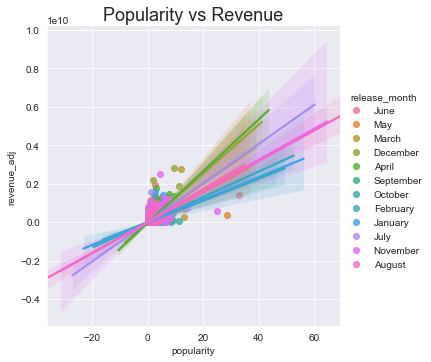

In [22]:
# Relationship of popularity and revenue
sns.lmplot(x = 'popularity', y = 'revenue_adj', hue = 'release_month', data = df_mon);
ax = plt.gca()
ax.set_title('Popularity vs Revenue', fontsize=18)

Popularity and reveune are positively correlated, which means high popularity associated with high reveune.

Text(0.5, 1.0, 'Runtime vs Revenue')

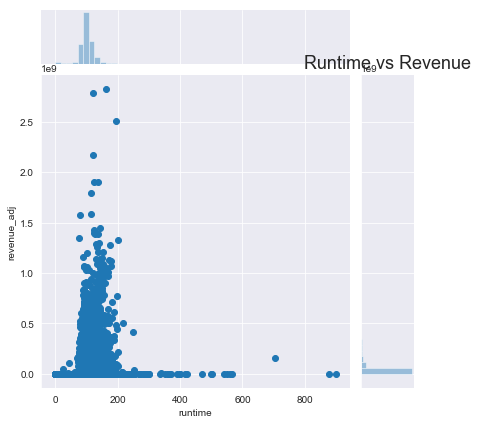

In [23]:
# Relationship of runtime and revenue
sns.jointplot(x='runtime', y='revenue_adj', data=df_filtered);
ax = plt.gca()
ax.set_title('Runtime vs Revenue', fontsize=18)

As shown above, revenue regariding runtime is right skewed. Runtime between 120 and 180 mins are most profitable, with around 150 mins are highest. Runtime being too short or too long would lead to low revenue.

Text(0.5, 1.0, 'Lead Actor vs Revenue')

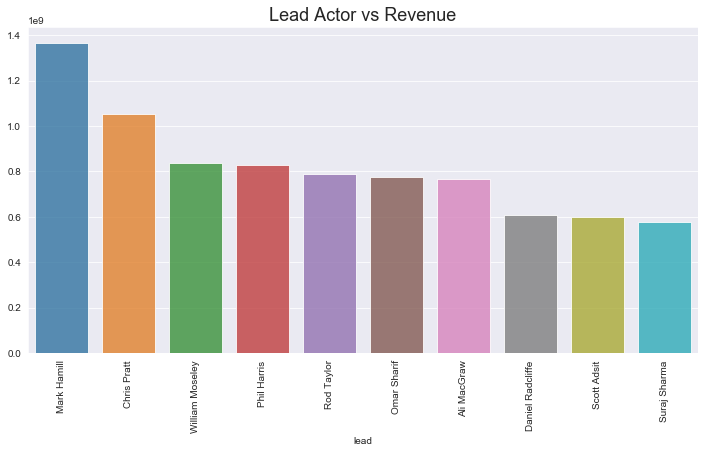

In [24]:
# Investigating leading actor's average contirbution on each single movie
# Finding out the corresponding average value
lead_rev = df_filtered.groupby(['lead'])['revenue_adj'].sum()/df_filtered.groupby(['lead'])['revenue_adj'].count()

# Selecting the top 10 leading actors to plot
lead_rev = lead_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(lead_rev.index,lead_rev.tolist(), alpha = 0.8);
ax = plt.gca()
ax.set_title('Lead Actor vs Revenue', fontsize=18)

The leading actor has great impact on the reveune, eg, the top 10 leading actor contribute from around 0.65 to 1.4 billion per movie averagely.

Text(0.5, 1.0, 'Director vs Revenue')

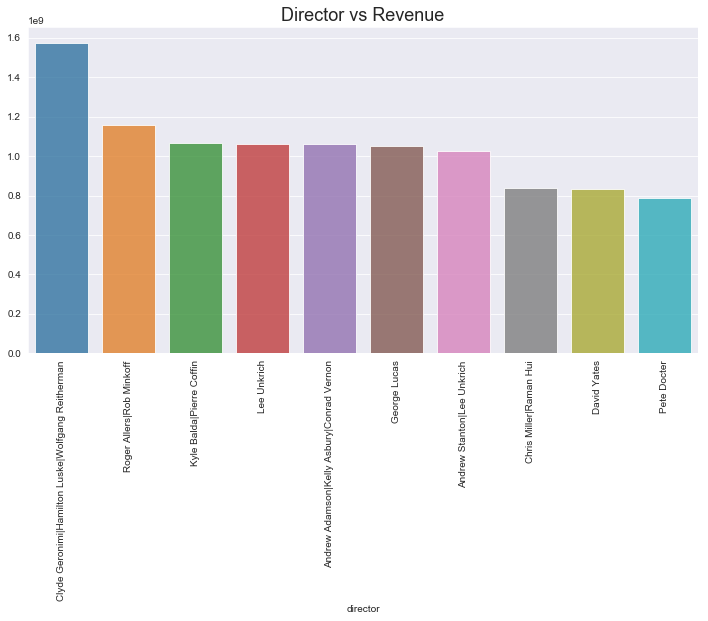

In [25]:
# Investigating director's average contirbution on each single movie
# Finding out the corresponding average value
dre_rev = df_filtered.groupby(['director'])['revenue_adj'].sum()/df_filtered.groupby(['director'])['revenue_adj'].count()

# Selecting the top 10 directors to plot
dre_rev = dre_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(dre_rev.index,dre_rev.tolist(), alpha = 0.8);
ax = plt.gca()
ax.set_title('Director vs Revenue', fontsize=18)

The director has great impact on the reveune, eg, the top 10 leading actor contribute from around 0.8 to 1.6 billion per movie averagely.

Text(0.5, 1.0, 'Vote Count vs Revenue')

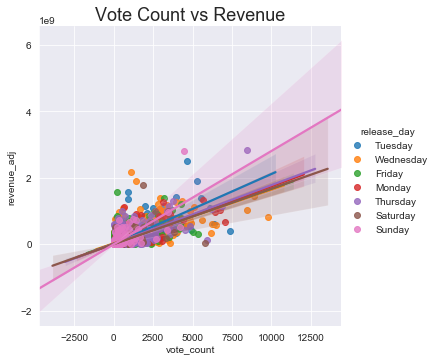

In [26]:
# Relationship of vote_count and revenue
sns.lmplot(x='vote_count', y='revenue_adj', hue = 'release_day', data=df_d);
ax = plt.gca()
ax.set_title('Vote Count vs Revenue', fontsize=18)

Vote_counts and reveune are positively correlated, which means high vote_counts associated with high reveune.

Text(0.5, 1.0, 'Vote Average vs Revenue')

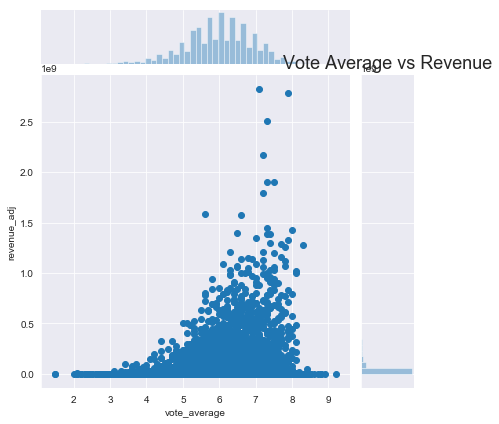

In [27]:
# Relationship of vote_average and revenue
sns.jointplot(x='vote_average', y='revenue_adj', data=df_filtered);
ax = plt.gca()
ax.set_title('Vote Average vs Revenue', fontsize=18)

As shown above, the distribution of revenue regarding to vote_average is left skewed. When vote_average is between 5 and 8 points is most profitable with 7 at the highest. Vote_average being too small or too big would lead to low revenue

Text(0.5, 1.0, 'Release Year vs Revenue')

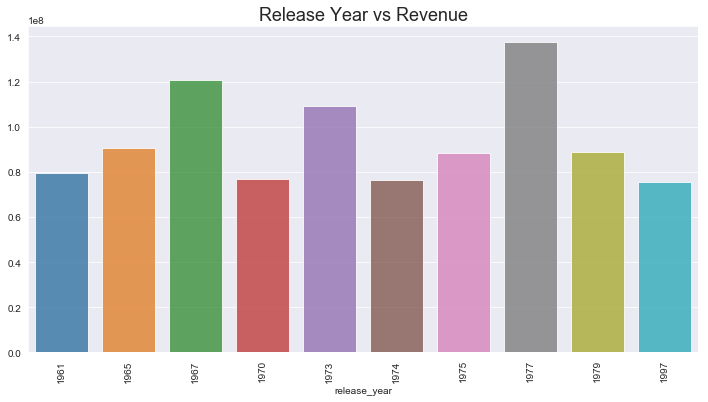

In [28]:
# Investigating relationship of release year and revenue
# Finding out the corresponding average value
reyr_rev = df_filtered.groupby(['release_year'])['revenue_adj'].sum()/df_filtered.groupby(['release_year'])['revenue_adj'].count()

# Selecting the top 10 years to plot
reyr_rev = reyr_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(reyr_rev.index,reyr_rev.tolist(), alpha = 0.8);
ax = plt.gca()
ax.set_title('Release Year vs Revenue', fontsize=18)

The release year is important determinant for reveune, as shown above in the top 10 release year, average revenue per movie ranging from around 80 million to 0.14 billion.

Text(0.5, 1.0, 'Release Month vs Revenue')

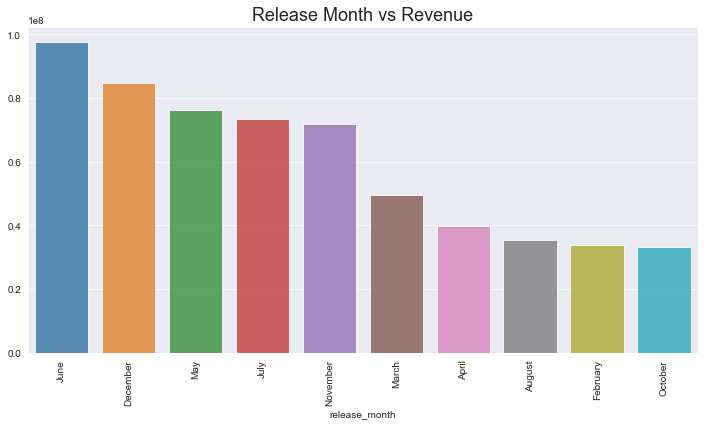

In [29]:
# Investigating relationship of release month and revenue
# Finding out the corresponding average value
remon_rev = df_mon.groupby(['release_month'])['revenue_adj'].sum()/df_mon.groupby(['release_month'])['revenue_adj'].count()

# Selecting the top 10 months to plot
remon_rev = remon_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(remon_rev.index,remon_rev.tolist(), alpha = 0.8)
ax = plt.gca()
ax.set_title('Release Month vs Revenue', fontsize=18)

The release month is important determinant for reveune, as shown above in the top 10 release month, average revenue per movie ranging from around 35 million to 0.1 billion.

Text(0.5, 1.0, 'Release Day vs Revenue')

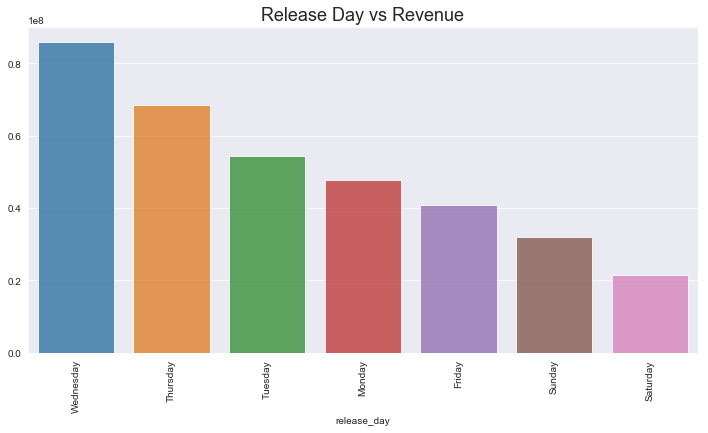

In [30]:
# Investigating relationship of release day and revenue
# Finding out the corresponding average value
reday_rev = df_d.groupby(['release_day'])['revenue_adj'].sum()/df_d.groupby(['release_day'])['revenue_adj'].count()

# Selecting the top 10 days to plot
reday_rev = reday_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(reday_rev.index,reday_rev.tolist(), alpha = 0.8)
ax = plt.gca()
ax.set_title('Release Day vs Revenue', fontsize=18)

The release day is important determinant for reveune, as shown above in the top 10 release day, average revenue per movie ranging from around 20 to 90 million.

Text(0.5, 1.0, 'Budget vs Revenue')

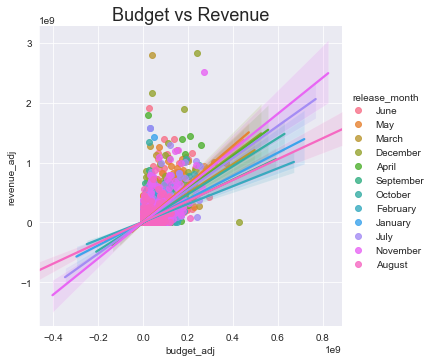

In [31]:
# Relationship of budget and revenue
sns.lmplot(x='budget_adj', y='revenue_adj', hue = 'release_month', data=df_mon)
ax = plt.gca()
ax.set_title('Budget vs Revenue', fontsize=18)

Budget and reveune are positively correlated, which means high budgets associated with high reveune.

<a id='conclusions'></a>
### Limitations
> <li> The limitations of current study were NaN values, which affected the process of analysis.
    
> <li> There are a lot of crew members apart from the director, cast and the production companies who help in creating a movie like writers, screenplay writers, editors, etc. but there was no data to analyse those aspects.

> <li> The budget and revenue columns did not have a currency specified so there may be some differences due to fluctuating exchange rates. Different countries may also have different rules and regulations they have to follow which may restrict them from artistiic freedom.

<a id='conclusions'></a>
## Conclusions
> In current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards. The dataset included 10866 pieces of film information ranging from 1960 to 2015, which consisted most of the main stream movies. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis. 

> The limitations of current study were NaN values, which could affect the process  of analysis. Luckily, those NaN values were all of category type, thus it has limited impact on arithmetric computing.

> However, it might matter when comparing category column with numerical column for analysis. The stragety appiled in current study is to keep those NaN value, but convert them as 'No record' which is a string type of data. The questions answered were somewhat affected by the NaN value.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_Movie_Data.ipynb'])

0